In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<h3>Формат CSV (comma-separated values)</h3>

In [2]:
# Создаем DataFrame с помощью pandas
data = {
    'word': ['кот', 'собака', 'информация', 'дом', 'университет', 'стол', 'программирование'],
    'length': [1, 2, 5, 1, 5, 1, 7],
    'frequency': [150, 90, 45, 200, 20, 120, 10],
    'reading_time_ms': [450, 520, 650, 430, 720, 470, 800]
}
df = pd.DataFrame(data)
print(df.head())

          word  length  frequency  reading_time_ms
0          кот       1        150              450
1       собака       2         90              520
2   информация       5         45              650
3          дом       1        200              430
4  университет       5         20              720


<h3>Основные метрики</h3>

In [3]:
# Описательная статистика для числовых колонок
print(df[['length', 'frequency', 'reading_time_ms']].describe())

# Отдельные метрики
print(f"Средняя длина слова: {df['length'].mean():.2f}")
print(f"Медианная частотность: {df['frequency'].median()}")

         length   frequency  reading_time_ms
count  7.000000    7.000000         7.000000
mean   3.142857   90.714286       577.142857
std    2.478479   70.618020       146.026742
min    1.000000   10.000000       430.000000
25%    1.000000   32.500000       460.000000
50%    2.000000   90.000000       520.000000
75%    5.000000  135.000000       685.000000
max    7.000000  200.000000       800.000000
Средняя длина слова: 3.14
Медианная частотность: 90.0


<h3>Гистограмма</h3>

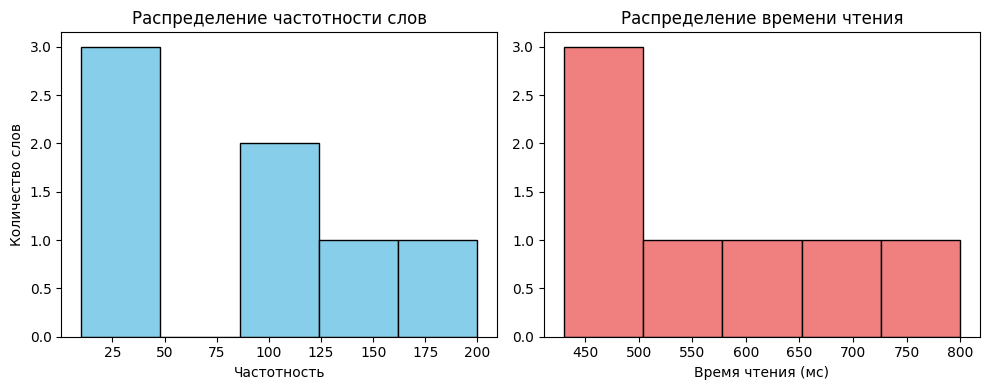

In [4]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(df['frequency'], bins=5, color='skyblue', edgecolor='black')
plt.title('Распределение частотности слов')
plt.xlabel('Частотность')
plt.ylabel('Количество слов')

plt.subplot(1, 2, 2)
plt.hist(df['reading_time_ms'], bins=5, color='lightcoral', edgecolor='black')
plt.title('Распределение времени чтения')
plt.xlabel('Время чтения (мс)')

plt.tight_layout()
plt.show()

<h3>Диаграмма рассеяния (Scatter Plot)</h3>

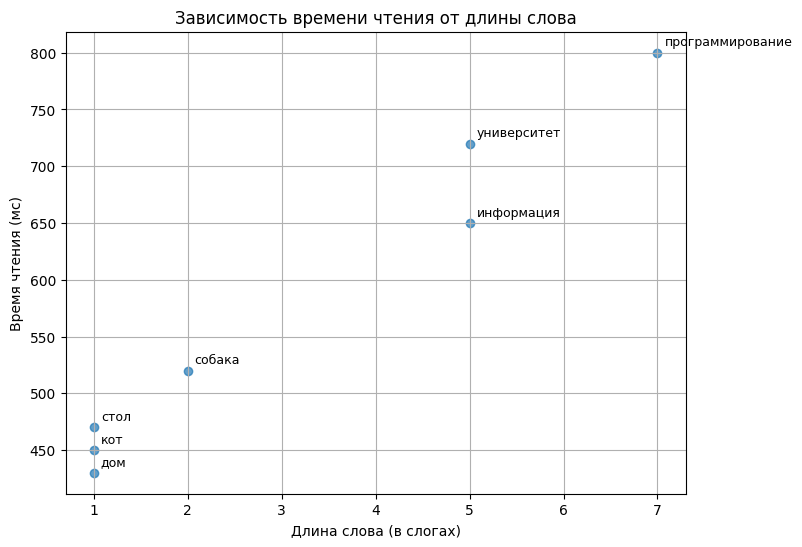

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(df['length'], df['reading_time_ms'], alpha=0.7)
plt.title('Зависимость времени чтения от длины слова')
plt.xlabel('Длина слова (в слогах)')
plt.ylabel('Время чтения (мс)')

# Добавим подписи точек
for i, word in enumerate(df['word']):
    plt.annotate(word, (df['length'][i], df['reading_time_ms'][i]), xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.grid(True)
plt.show()

<h3>Проверка статистических гипотез</h3>



Нулевая гипотеза (H₀): "Между длиной слова и временем чтения нет корреляции".

Альтернативная гипотеза (H₁): "Между длиной слова и временем чтения есть корреляция".

Уровень значимости (p-value): (вероятность получить такие же или более экстремальные результаты при условии, что H₀ верна). Обычно берут p < 0.05.


Коэффициент корреляции Пирсона: для измерения линейной связи между двумя количественными переменными.

In [6]:
# Расчет корреляции
pearson_corr, p_value = stats.pearsonr(df['length'], df['reading_time_ms'])
print(f"Коэффициент корреляции Пирсона: {pearson_corr:.4f}")
print(f"P-value: {p_value:.6f}")

Коэффициент корреляции Пирсона: 0.9868
P-value: 0.000038


Сравнение двух групп (t-тест)

Допустим, у нас есть два жанра текстов (художественный и научный). Мы хотим проверить, различается ли в них средняя длина предложения.

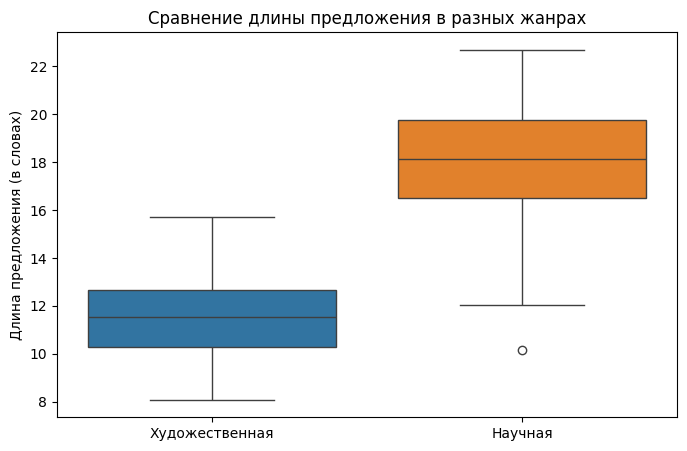

In [7]:
# Генерируем данные для двух групп
np.random.seed(42) # для воспроизводимости результатов
genre_fiction = np.random.normal(loc=12, scale=2, size=50)  # худ. лит., сред. дл. ~12 слов
genre_academic = np.random.normal(loc=18, scale=3, size=50) # акад. текст, сред. дл. ~18 слов

# Визуализируем с помощью boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=[genre_fiction, genre_academic])
plt.xticks([0, 1], ['Художественная', 'Научная'])
plt.ylabel('Длина предложения (в словах)')
plt.title('Сравнение длины предложения в разных жанрах')
plt.show()

t-критерий Стьюдента для независимых выборок

In [8]:
t_stat, p_value = stats.ttest_ind(genre_academic, genre_fiction)
print(f"T-статистика: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

T-статистика: 14.28
P-value: 0.0000


<h3>Анализ категориальных данных с помощью хи-квадрат</h3>

Данные для хи-квадрат представляются в виде таблицы, где строки — это одна категориальная переменная, а столбцы — другая.

Ячейки содержат частоты (количество наблюдений).

In [9]:
# Создаем искусственные данные для примера
# Предположим, мы проаннотировали по 200 слов из каждого жанра

# Таблица сопряженности: строки - жанры, столбцы - части речи
data_cross = {
    'Существительное': [80, 60],   # Новости: 80 сущ., Поэзия: 60 сущ.
    'Глагол': [70, 50],            # Новости: 70 глаг., Поэзия: 50 глаг.
    'Прилагательное': [50, 90]     # Новости: 50 прил., Поэзия: 90 прил.
}
chi2_df = pd.DataFrame(data_cross, index=['Новости', 'Поэзия'])
print("Таблица сопряженности:")
print(chi2_df)

Таблица сопряженности:
         Существительное  Глагол  Прилагательное
Новости               80      70              50
Поэзия                60      50              90


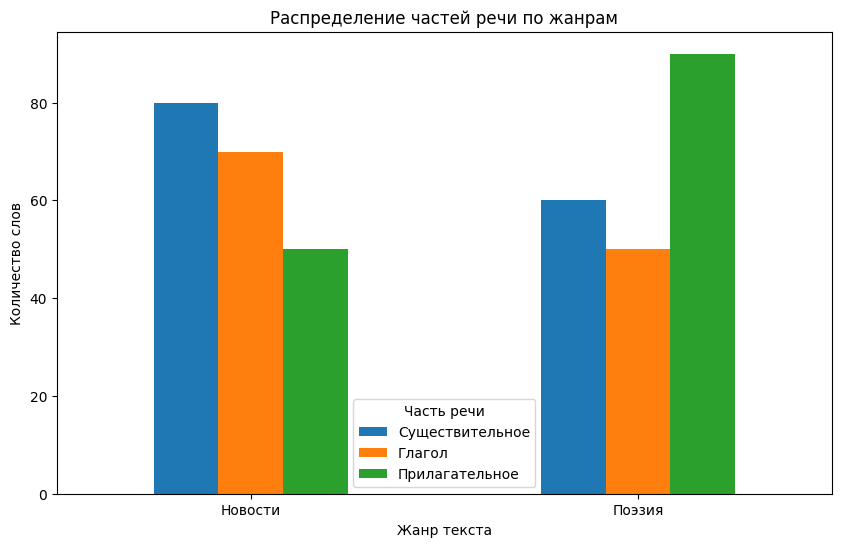

In [10]:
# Строим столбчатую диаграмму для наглядности
chi2_df.plot(kind='bar', figsize=(10, 6))
plt.title('Распределение частей речи по жанрам')
plt.xlabel('Жанр текста')
plt.ylabel('Количество слов')
plt.legend(title='Часть речи')
plt.xticks(rotation=0)
plt.show()

In [11]:
# Выполняем тест хи-квадрат
chi2_stat, p_value, dof, expected = stats.chi2_contingency(chi2_df)

print("РЕЗУЛЬТАТЫ ТЕСТА ХИ-КВАДРАТ:")
print(f"Хи-квадрат статистика: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Степени свободы: {dof}")
print("\nОжидаемые частоты (если бы жанры не влияли на распределение):")
print(pd.DataFrame(expected, columns=chi2_df.columns, index=chi2_df.index))

РЕЗУЛЬТАТЫ ТЕСТА ХИ-КВАДРАТ:
Хи-квадрат статистика: 17.62
P-value: 0.0001
Степени свободы: 2

Ожидаемые частоты (если бы жанры не влияли на распределение):
         Существительное  Глагол  Прилагательное
Новости             70.0    60.0            70.0
Поэзия              70.0    60.0            70.0


Задание 1. Взять два небольших текста разных жанров. Сравнить среднюю длину слов в двух типах текстов с помощью t-критерия Стьюдента. Построить гистограммы длин слов для каждого текста.

Задание 2. Взять два небольших текста разных жанров. С помощью pymorphy3 определить распределение частей речи для каждого.

Построить таблицу сопряженности и проверить гипотезу о различии в распределении частей речи с помощью хи-квадрат.